In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.neighbors import  KNeighborsClassifier

from openpyxl import load_workbook
from typing import Tuple

from imageProcessing import reduceImageOfEllipseAndGetNewCenter, reduceImageOfEllipse,\
    getTransformationParameters, getTransformedImage,\
        getBoundriesAndMask, reduceImageAndRemoveBackground

from hiDetectionDataPrepFunctions import addToDataSet, prepareDataSet, getEllipse, \
    getFrames, testDetection

C:\Users\user\AppData\Local\Temp\ipykernel_14692\3928242259.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


To add regular frame (no hit) pass 3 following frames from video                
To add frame with moment of hit pass 3 following frames, which third is moment of hit               
Pass last argument : 0 if data corresponds to regular frame, 1 if data corresponds to frame with moment of hit

!!! Frames must be trasnformed already !!!

To prepare frames you may use following code:                       
1. pass a path to video file, press q when you want to get frames, or pass a number of frame (chosen experimentally)

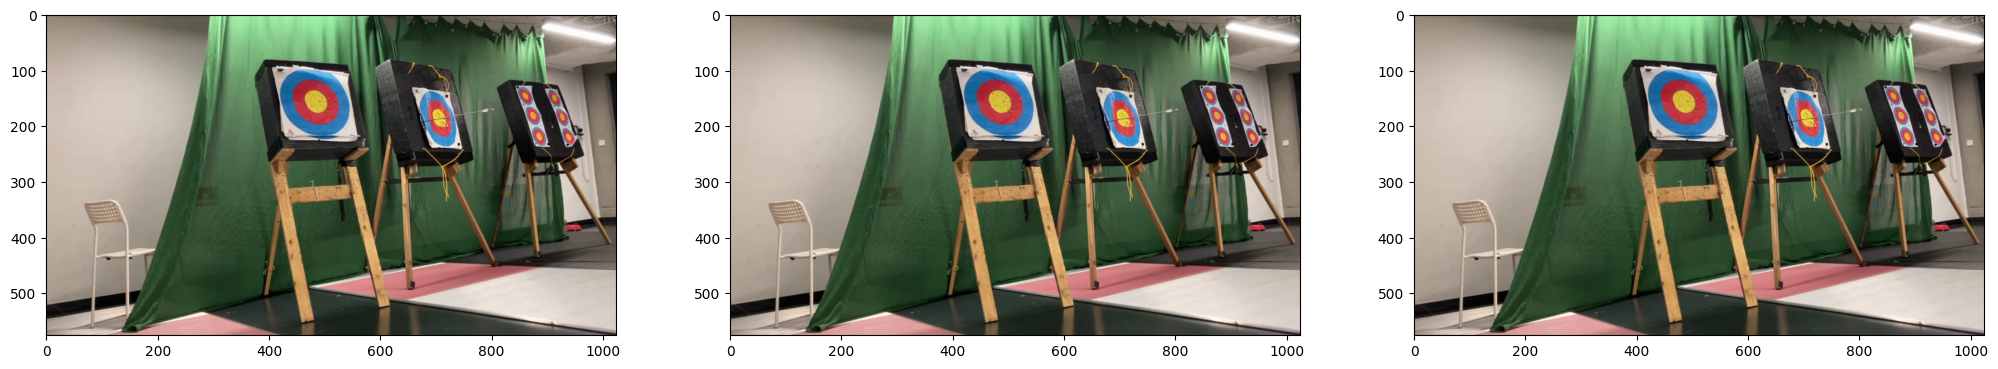

In [3]:
frame, pframe, ppframe = getFrames("testVideosAndImages/vid3.mp4")

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
pframe = cv2.cvtColor(pframe, cv2.COLOR_BGR2RGB)
ppframe = cv2.cvtColor(ppframe, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1,3)

axs[0].imshow(ppframe)
axs[1].imshow(pframe)
axs[2].imshow(frame)

fig.set_figwidth(25)
fig.set_figheight(25)

2. mark the target on one of the frames

Point selected: 433, 111
Point selected: 435, 187
Point selected: 471, 214
Point selected: 533, 204
Point selected: 531, 128
Selected points: [(433, 111), (435, 187), (471, 214), (533, 204), (531, 128)]
Final selected points: [(433, 111), (435, 187), (471, 214), (533, 204), (531, 128)]


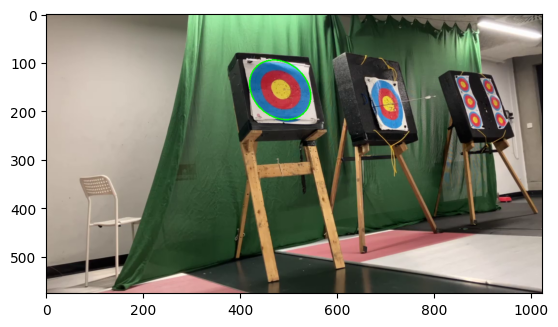

In [4]:
ell = getEllipse(frame.copy())

plt.figure()
imEll = cv2.ellipse(frame.copy(), ell, (0,255,0), 2)
plt.imshow(imEll)

3. process the frames

In [5]:
imred, newell = reduceImageOfEllipseAndGetNewCenter(frame, ell)
pimred = reduceImageOfEllipse(pframe, ell)
ppimred = reduceImageOfEllipse(ppframe, ell)

imtrans, rotMat, scMat, center = getTransformationParameters(imred, newell)
pimtrans = getTransformedImage(pimred, rotMat, scMat)
ppimtrans = getTransformedImage(ppimred, rotMat, scMat)


bnds, mask = getBoundriesAndMask(imtrans, center, newell[1][1])

imFinal = reduceImageAndRemoveBackground(imtrans, bnds, mask)
pimFinal = reduceImageAndRemoveBackground(pimtrans, bnds, mask)
ppimFinal = reduceImageAndRemoveBackground(ppimtrans, bnds, mask)

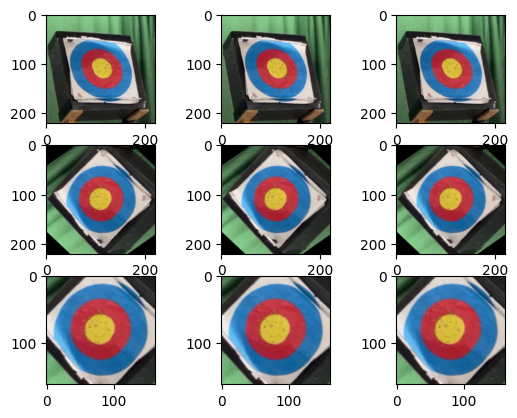

In [6]:
fig, axs = plt.subplots(3,3)

axs[0,0].imshow(imred)
axs[0,1].imshow(pimred)
axs[0,2].imshow(ppimred)

axs[1,0].imshow(imtrans)
axs[1,1].imshow(pimtrans)
axs[1,2].imshow(ppimtrans)

axs[2,0].imshow(imFinal)
axs[2,1].imshow(pimFinal)
axs[2,2].imshow(ppimFinal)

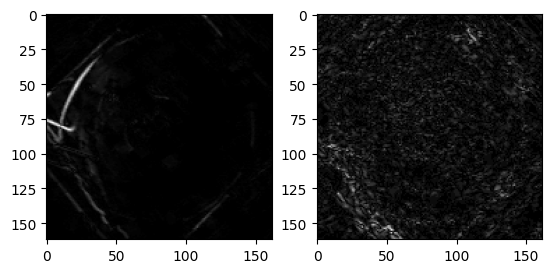

In [171]:
frameGray = cv2.cvtColor(imFinal.copy(), cv2.COLOR_RGB2GRAY)
pframeGray = cv2.cvtColor(pimFinal.copy(), cv2.COLOR_RGB2GRAY)
ppframeGray = cv2.cvtColor(ppimFinal.copy(), cv2.COLOR_RGB2GRAY)

diff = np.abs(frameGray.astype(np.int16)-pframeGray.astype(np.int16)).astype(np.uint8)
pdiff = np.abs(pframeGray.astype(np.int16)-ppframeGray.astype(np.int16)).astype(np.uint8)

fig, axs = plt.subplots(1,2)
axs[0].imshow(diff, 'gray')
axs[1].imshow(pdiff, 'gray')

In [ ]:
arrow = cv2.cvtColor(imFinal.copy(), cv2.COLOR_BGR2RGB)
parrow = cv2.cvtColor(pimFinal.copy(), cv2.COLOR_BGR2RGB)
pparrow = cv2.cvtColor(ppimFinal.copy(), cv2.COLOR_BGR2RGB)

#cv2.imwrite('testVideosAndImages/diff8.jpg', diff)
#cv2.imwrite('testVideosAndImages/pdiff8.jpg', pdiff)
#cv2.imwrite('testVideosAndImages/arrow8.jpg', arrow)
#cv2.imwrite('testVideosAndImages/parrow8.jpg', parrow)
#cv2.imwrite('testVideosAndImages/pparrow8.jpg', pparrow)

True

4. final step: add frames to dataset

In [173]:
addToDataSet(ppimFinal, pimFinal, imFinal)

If u want to test hit detection, use following code:                                
pass video path, ellipse created in previous code sections and dataset created of excel file in the folder

In [ ]:
testDetection("testVideosAndImages/vid3.mp4", ell, prepareDataSet())